## scikit-learnのSVMでirisデータセットを分類
## Classifying iris datasets with scikit-learn SVM
### Reference
https://note.nkmk.me/python-scikit-learn-svm-iris-dataset/

### seabornで可視化
### Visualisation with seaborn

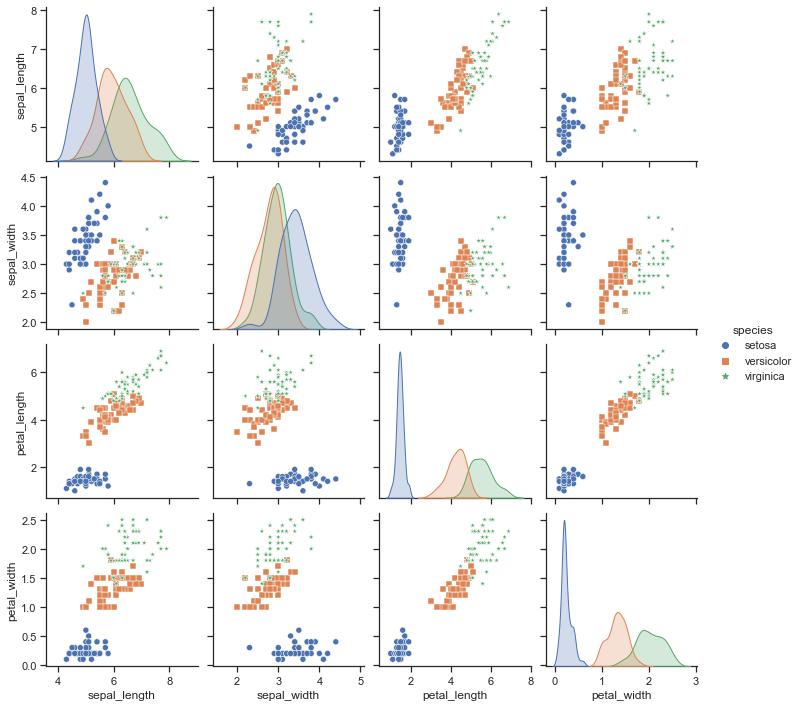

In [4]:
import seaborn as sns

sns.set(style="ticks")

df = sns.load_dataset("iris")

# http://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df, hue='species', markers=["o", "s", "*"]).savefig('data/dst/seaborn_iris.png')

### scikit-learnのSVMで分類
### Classified by SVM in scikit-learn

In [5]:
import pandas as pd
from sklearn import datasets, model_selection, svm, metrics

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = datasets.load_iris()

print(type(iris))
print(iris.keys())
# <class 'sklearn.datasets.base.Bunch'>
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# head()で最初の5件だけ出力
# Output only the first 5 items with head()
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [8]:
iris_label = pd.Series(data=iris.target)
print(iris_label.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [9]:
print(len(iris_data))

150


### 学習用とテスト用に分割
### Separate them into train set and test set

In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
data_train, data_test, label_train, label_test = model_selection.train_test_split(iris_data, iris_label)

print(data_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
148                6.2               3.4                5.4               2.3
124                6.7               3.3                5.7               2.1
108                6.7               2.5                5.8               1.8
38                 4.4               3.0                1.3               0.2
128                6.4               2.8                5.6               2.1


In [11]:
print(label_train.head())

148    2
124    2
108    2
38     0
128    2
dtype: int64


In [12]:
# default value of test_size = 0.25
print(len(data_train), len(data_test))

112 38


### SVMで学習
### Learning with SVM

In [13]:
clf = svm.SVC()
clf.fit(data_train, label_train)
pre = clf.predict(data_test)

print(type(pre))
print(pre)

<class 'numpy.ndarray'>
[1 1 1 1 1 2 2 1 2 1 0 1 0 0 0 0 0 1 0 1 2 2 2 2 0 1 0 2 0 0 2 0 1 2 2 2 2
 1]


### 結果確認
### Confirmation of results

In [14]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
ac_score = metrics.accuracy_score(label_test, pre)

print(ac_score)

0.9736842105263158
